# Planning Methods: Part II, Spring 2023

# Lab 1: Stats Review and Plotting

**About This Lab**
* We will be running through this notebook together. If you have a clarifying question or other question of broad interest, feel free to interrupt or use a pause to unmute and ask it! If you have a question that may result in a one-on-one breakout room (think: detailed inquiry, conceptual question, or help debugging), please ask it in the chat!
* We recognize learning Python via Zoom comes with its challenges and that there are many modes of learning. Please go with what works best for you. That might be printing out the Jupyter notebook, duplicating it such that you can refer to the original, working directly in it. Up to you! There isn't a single right way.
* This lab requires that you download the following file and place it in the same directory as this Jupyter notebook:
    * `property_data.csv`

## Objectives
By the end of this lab, you will have reviewed how to:
1. Read and write files
2. Check for and drop nulls
3. Export data
4. Create subdataframes
5. Produce descriptive statistics
6. Conduct statistical tests

You will also learn how to:
1. Check for outliers 
2. Define a function

## 1 Import packages

In [1]:
import pandas as pd, numpy as np, matplotlib as mpl, math

pd.options.display.float_format = '{:.2f}'.format
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

%matplotlib inline
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import t, chisquare, iqr
from scipy.stats import ttest_ind

import warnings 
warnings.filterwarnings('ignore')

In [2]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import researchpy as rp

In [4]:
# filepath for csv == 'Lab Data/property_data.csv'

## 2 Connect to and clean data

In [5]:
raw = pd.read_csv('Data/property_data.csv')
raw.head()

,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,floor,...,pcnt_indu,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi
0,40003,60000.00,1.00,0.00,0.00,0.00,0.00,0.00,1,5.00,...,0.00,0.00,0.49,0.00,1.74,39.92,0,0,11.00,0
1,40039,39000.00,1.00,0.00,0.00,0.00,0.00,0.00,0,0.00,...,0.00,9.21,1.73,0.00,0.69,46.00,1,0,10.57,0
2,40007,140000.00,0.00,1.00,0.00,0.00,0.00,0.00,0,0.00,...,0.00,15.41,1.32,0.00,0.54,46.00,1,0,11.85,1
3,40008,38000.00,0.00,1.00,0.00,0.00,0.00,0.00,1,1.00,...,0.00,8.16,5.57,0.00,1.55,45.87,0,0,10.55,0
4,40010,110000.00,0.00,1.00,0.00,0.00,0.00,0.00,0,0.00,...,0.00,8.11,5.53,0.00,1.58,45.88,1,0,11.61,1


In [6]:
raw.dtypes

id               int64
price_000      float64
yr_2001        float64
yr_2002        float64
yr_2003        float64
yr_2004        float64
yr_2005        float64
yr_2006        float64
apt              int64
floor          float64
age_0_10       float64
age_10_20      float64
age_20_more    float64
num_room       float64
num_bath       float64
num_garage     float64
area_m2        float64
ses            float64
pop_dens       float64
pcnt_indu      float64
pcnt_com       float64
pcnt_insti     float64
pcnt_vacant    float64
pcn_green      float64
homicides      float64
house            int64
ses_bin          int64
lnprice        float64
price_hi         int64
dtype: object

In [7]:
# convert id variable type
raw['id'] = raw['id'].astype(str)
raw.dtypes

id              object
price_000      float64
yr_2001        float64
yr_2002        float64
yr_2003        float64
yr_2004        float64
yr_2005        float64
yr_2006        float64
apt              int64
floor          float64
age_0_10       float64
age_10_20      float64
age_20_more    float64
num_room       float64
num_bath       float64
num_garage     float64
area_m2        float64
ses            float64
pop_dens       float64
pcnt_indu      float64
pcnt_com       float64
pcnt_insti     float64
pcnt_vacant    float64
pcn_green      float64
homicides      float64
house            int64
ses_bin          int64
lnprice        float64
price_hi         int64
dtype: object

### 2.1 Drop nulls

In [8]:
# check for null values
raw.isnull().sum()

id             0
price_000      2
yr_2001        2
yr_2002        2
yr_2003        2
yr_2004        2
yr_2005        2
yr_2006        2
apt            0
floor          1
age_0_10       1
age_10_20      1
age_20_more    1
num_room       1
num_bath       1
num_garage     1
area_m2        2
ses            4
pop_dens       2
pcnt_indu      1
pcnt_com       1
pcnt_insti     1
pcnt_vacant    1
pcn_green      0
homicides      0
house          0
ses_bin        0
lnprice        0
price_hi       0
dtype: int64

In [9]:
# how many observations would be dropped?
null_values = raw.isnull().sum(axis = 1)

num_obs = len(raw[null_values>0])

print(num_obs, len(raw))
raw[null_values>0]

9 3985


,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,floor,...,pcnt_indu,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi
1,40039,39000.00,1.00,0.00,0.00,0.00,0.00,0.00,0,0.00,...,0.00,9.21,1.73,0.00,0.69,46.00,1,0,10.57,0
12,40018,65000.00,0.00,0.00,0.00,0.00,0.00,0.00,1,3.00,...,0.00,8.14,7.62,0.00,0.57,46.00,0,0,11.08,0
50,40018,89191.50,1.00,0.00,0.00,0.00,0.00,0.00,1,3.00,...,NaN,NaN,NaN,NaN,0.14,41.06,0,0,11.40,0
63,40197,57500.00,NaN,NaN,NaN,NaN,NaN,NaN,1,1.00,...,0.00,0.00,1.49,0.00,0.21,35.76,0,0,10.96,0
107,40330,145000.00,1.00,0.00,0.00,0.00,0.00,0.00,0,NaN,...,0.00,0.00,1.60,0.00,0.61,34.00,1,0,11.88,1
124,40495,40000.00,1.00,0.00,0.00,0.00,0.00,0.00,1,7.00,...,0.00,0.00,1.19,0.00,0.00,38.88,0,0,10.60,0
477,42486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,...,0.00,4.74,0.83,0.00,0.58,46.00,1,0,11.61,1
2523,506972,NaN,1.00,0.00,0.00,0.00,0.00,0.00,1,2.00,...,0.44,3.67,17.18,5.52,5.41,137.38,0,0,11.08,0
3477,504693,52000.00,0.00,0.00,0.00,0.00,0.00,1.00,1,4.00,...,53.14,0.00,1.02,3.93,0.22,234.00,0,0,10.86,0


In [10]:
# drop NaN values
df = raw.dropna().reset_index(drop = True)
df.head()

,id,price_000,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,apt,floor,...,pcnt_indu,pcnt_com,pcnt_insti,pcnt_vacant,pcn_green,homicides,house,ses_bin,lnprice,price_hi
0,40003,60000.00,1.00,0.00,0.00,0.00,0.00,0.00,1,5.00,...,0.00,0.00,0.49,0.00,1.74,39.92,0,0,11.00,0
1,40007,140000.00,0.00,1.00,0.00,0.00,0.00,0.00,0,0.00,...,0.00,15.41,1.32,0.00,0.54,46.00,1,0,11.85,1
2,40008,38000.00,0.00,1.00,0.00,0.00,0.00,0.00,1,1.00,...,0.00,8.16,5.57,0.00,1.55,45.87,0,0,10.55,0
3,40010,110000.00,0.00,1.00,0.00,0.00,0.00,0.00,0,0.00,...,0.00,8.11,5.53,0.00,1.58,45.88,1,0,11.61,1
4,40011,120000.00,0.00,1.00,0.00,0.00,0.00,0.00,0,0.00,...,0.00,0.00,0.00,0.00,0.40,46.00,1,0,11.70,1


### 2.2 Check for outliers
Plus a sneak preview of plots!

<img src = 'Data/boxplots.jpg' width = 500>
Source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

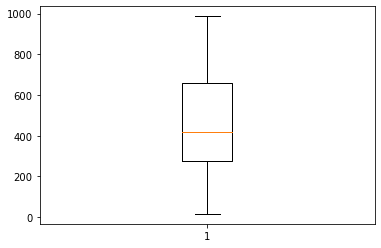

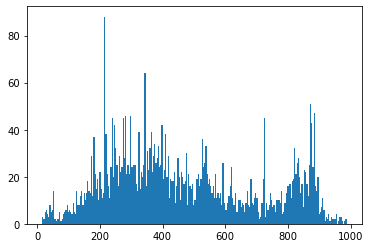

In [11]:
# visualize population density
x = df['pop_dens']
plt.boxplot(x)
plt.show()
plt.hist(x, 250)
plt.show()

In [12]:
# visualize price

In [13]:
# how many observations would be dropped if we got rid of 'price_000' outliers?
# step 1: calculate interquartile range

In [14]:
# step 2: use the 1.5xIQR rule 

### 2.3 Export clean data (for future labs)
Name it whatever you'd like and remeber where you save it so you can access next week.

In [15]:
df.to_csv('clean_property_data.csv', index = False)

### 2.4 Create sub-dataframe

In [16]:
sub_df = df[['house','apt','price_000','age_0_10','age_20_more','pcn_green','num_room']].copy()
sub_df.head()

,house,apt,price_000,age_0_10,age_20_more,pcn_green,num_room
0,0,1,60000.00,1.00,0.00,1.74,3.00
1,1,0,140000.00,0.00,0.00,0.54,4.00
2,0,1,38000.00,0.00,0.00,1.55,3.00
3,1,0,110000.00,0.00,0.00,1.58,4.00
4,1,0,120000.00,0.00,0.00,0.40,4.00


In [17]:
# rename variables of interest
sub_df.rename(columns={"price_000":"price", 
                   "age_0_10":"age_new", 
                   "age_20_more":"age_old", 
                   "num_room":"rooms"}, inplace = True)

## 3 Describe variables

### 3.1 Continuous variable

In [18]:
# descriptive stats for property price

In [19]:
# if we're only interested in certain statistics, we can also call them up specifically 
# print the median and interquartile range

In [20]:
# note the median is equal to the 50% percentile above and IQR is equal to the 75th percentile minus the 25th

Next week we'll learn how to use a histogram to visualize the distribution of a continous variable.


### 3.2 Discrete numeric variable (dummy variable)

In [21]:
# descriptive stats for house dv

In [22]:
# we can also use the value_counts function (in general, it gives us a better sense of categorical variables)

In [23]:
# and we can normalize value_counts to get percentages

#### 3.2.1 Define a function

A function is a block of reusable code used to perform a single action that only runs when called. Python has many built in functions (like 'print') but you can also create your own.  

In [24]:
# if we want to see counts and percentages together, we can concatenate these outputs into one table

# defining a function called 'tab' that can take in any dataframe and any variable and return the output below

def tab(df, x):
    """This function concatenates the counts and percentages for a single variable in a dataframe."""
    
    print ("Total Count", df[x].count())
    print ("Total Pct", sum(df[x].value_counts(normalize=True)))
    
    return pd.concat([ df[x].value_counts(), df[x].value_counts(normalize=True) ], 
                     axis=1, keys=('counts','pct'))

In [25]:
# call the function
tab(sub_df, 'house')

Total Count 3976
Total Pct 1.0


,counts,pct
0,2690,0.68
1,1286,0.32


In [26]:
# what steps could you take to apply this function to a different dataframe? 
# (hint: df in the function, and df at the where we call it with 'house' aren't the same thing...)

#### 3.2.2 Stats for all variables

In [27]:
# these functions have been helpful for individual variables, but say you want to see summary stats for ALL the 
# variables in your dataframe at once?

In [28]:
# if you want to see summary statistics like this for just a few variables, see the appendix code at the bottom!

## 4 Statistical tests

In [29]:
# define universal set of statistics to be called with ".agg" command

### 4.1 T-test (of means)

#### 4.1.1 Do apartments have different prices from houses?

In [30]:
# descriptive price stats for apartment dv 
# groupby and aggregate functions are helpful for looking at crosstabulated summary statistics

In [31]:
# create apt and non-apt price variables

In [32]:
# run t-test

In [34]:
# if you wanted to normalize the price of a property by the number of bedrooms, how would you change the code? 
# (hint: more than one right answer!!)

# create per room price variable in dataframe
sub_df['pp_rm'] = sub_df['price']/sub_df['rooms']

# create variables for t-test
apt_rm_p = sub_df[df.apt == 1].pp_rm #Apartment Price per Room
n_apt_rm_p = sub_df[df.apt == 0].pp_rm #Non-Apartment Price per Room

# run t-test
ttest_ind(apt_rm_p, n_apt_rm_p, equal_var = False, nan_policy="omit")

Ttest_indResult(statistic=0.13576881903359253, pvalue=0.8920129308585947)

In [35]:
# can also run t-test with researchpy if that's your preference!

#### 4.1.2 Is the price of newer apartments different from older apartments?

In [36]:
# what descriptive stats are relevant here? 
# create subdataframe, group price of apartments by new vs. old

In [37]:
# create old and new apartment price variables

In [38]:
# run t-test

### 4.2 Chi-square test (of proportions)

#### 4.2.1 Are houses more likely to be older (age_20_more) or younger?

In [39]:
# descriptive stats (crosstab)

In [40]:
# normalize by row ('index') - could also normalize by 'columns'

In [41]:
# run chi-square test

In [42]:
# view table

In [43]:
# view results

### Appendix A - Defining Functions

In [44]:
# showing null values in order
# will only show null counts for rows that have more than 0 null values

### define the function
def var_nulls (df):
    null_counts = df.isnull().sum() #sum of null counts attributed to a variable
    return null_counts[null_counts > 0].sort_values(ascending=False) #sort values greater than 0 largest to smallest

### call the function
var_nulls(raw)

# output shows blank list because we have no null values here

ses            4
price_000      2
area_m2        2
yr_2002        2
yr_2003        2
yr_2004        2
yr_2005        2
yr_2006        2
yr_2001        2
pop_dens       2
pcnt_insti     1
pcnt_com       1
pcnt_indu      1
age_20_more    1
num_garage     1
num_bath       1
num_room       1
age_10_20      1
age_0_10       1
floor          1
pcnt_vacant    1
dtype: int64

In [45]:
# value counts - see counts and percentages together

### define the function
def tab(df, x):
    print ("Total Count", df[x].count())
    print ("Total Pct", sum(df[x].value_counts(normalize=True)))
    return pd.concat([df[x].value_counts(), df[x].value_counts(normalize=True)], 
                     axis=1, keys=('counts','pct'))

### call the function
tab(sub_df, 'house') #specify the dataframe and the variable in the parentheses

Total Count 3976
Total Pct 1.0


,counts,pct
0,2690,0.68
1,1286,0.32


In [46]:
# we used the groupby function before each statistical test we used - we can also call this up with one function!

### define the function
def grpby_stats (df, var1, var2):
    stat = ['count', 'mean', 'min', 'max', 'median', 'std'] #specify the statistics we want
    return df[var1].groupby(df[var2]).agg(stat) #group the first variable by the second variable, and aggregate stats

### call the function
grpby_stats(sub_df, 'price', 'apt') #specify the dataframe, key variabe, and grouping variable in the parentheses

# does this work for the test in 4.1.2, where we define apt_p = (sub_df[sub_df.apt == 1].price)? try it out!

,count,mean,min,max,median,std
apt,,,,,,
0,1286,123234.51,20000.00,740000.00,105000.00,76437.63
1,2690,79301.24,20000.00,800000.00,60000.00,70805.11


In [47]:
# if you want to see this for ALL the variables in your dataframe, you use this code.
# this asks Python to describe the entire dataframe, and transpose (T) the columns and rows
# try deleting the .T to see what happens if you don't use it - either way is fine!

sub_df.describe().T

,count,mean,std,min,25%,50%,75%,max
house,3976.00,0.32,0.47,0.00,0.00,0.00,1.00,1.00
apt,3976.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
price,3976.00,93511.05,75516.07,20000.00,50000.00,72000.00,110000.00,800000.00
age_new,3976.00,0.17,0.37,0.00,0.00,0.00,0.00,1.00
age_old,3976.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
pcn_green,3976.00,3.37,7.87,0.00,0.32,0.98,3.37,57.00
rooms,3976.00,3.05,1.05,1.00,2.00,3.00,4.00,7.00
pp_rm,3976.00,31914.10,24523.78,5000.00,17666.67,26000.00,37500.00,543000.00


In [48]:
# what if you just want to view a few of your key variables of interest?

# list of key variables
key_var = ['apt','price','rooms']

# code calling a few variables 
sub_df[key_var].describe().T

# you could also use this code below if you don't want to separately define a list of variables: 
sub_df[['apt','price','rooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
apt,3976.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
price,3976.00,93511.05,75516.07,20000.00,50000.00,72000.00,110000.00,800000.00
rooms,3976.00,3.05,1.05,1.00,2.00,3.00,4.00,7.00
